In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from obspy import read
from scipy.signal import find_peaks
from obspy.core import UTCDateTime
from mayavi import mlab

In [3]:
st = read("RJOB_061005_072159.ehz.new")
tr = st[0]

In [4]:
sampling_rate = tr.stats.sampling_rate
npts = tr.stats.npts
starttime = tr.stats.starttime

In [5]:
time = np.linspace(0, npts / sampling_rate, npts)

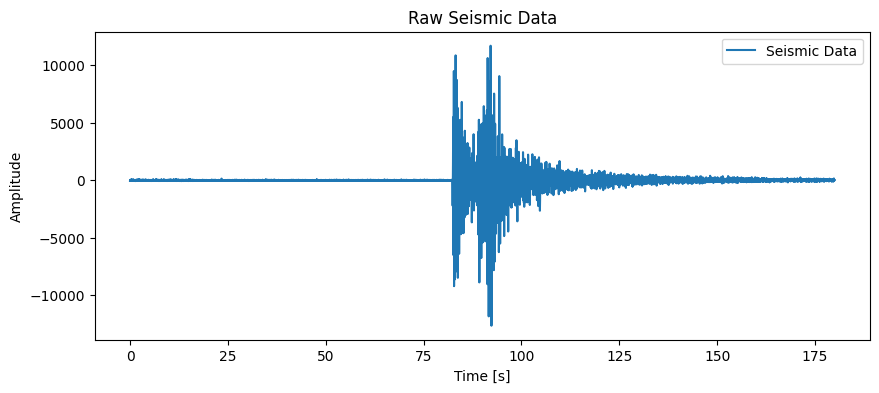

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(time, tr.data, label='Seismic Data')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Raw Seismic Data')
plt.legend()
plt.show()

In [7]:
peaks, _ = find_peaks(tr.data, height=0.5, distance=100)
peak_times = peaks / sampling_rate

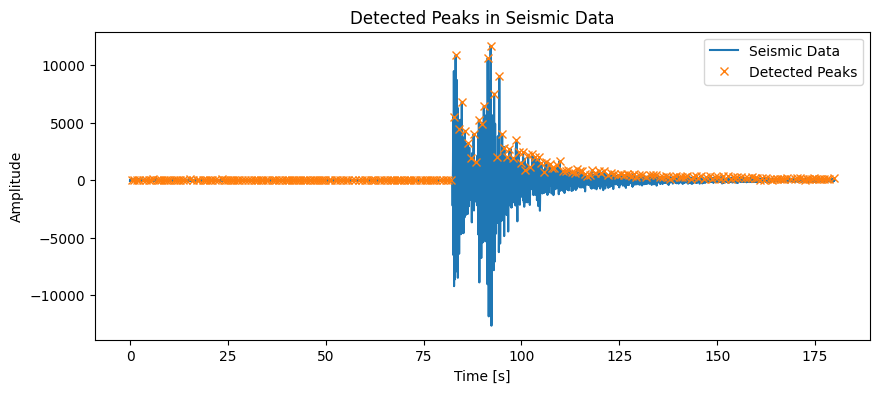

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(time, tr.data, label='Seismic Data')
plt.plot(peak_times, tr.data[peaks], "x", label='Detected Peaks')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Detected Peaks in Seismic Data')
plt.legend()
plt.show()

In [9]:
peaks, _ = find_peaks(tr.data, height=500, distance=100)

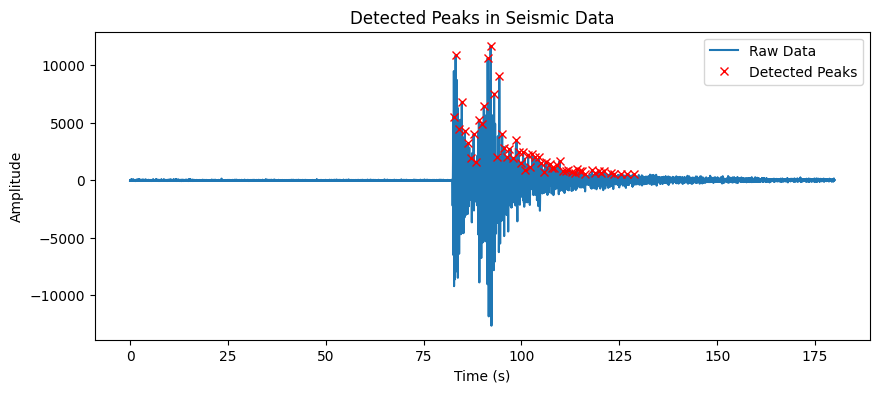

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(tr.times(), tr.data, label='Raw Data')
plt.plot(tr.times()[peaks], tr.data[peaks], "x", label='Detected Peaks', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Detected Peaks in Seismic Data')
plt.legend()
plt.show()


In [11]:
event_times = tr.times()[peaks]
print("Detected event times (s):", event_times)

Detected event times (s): [ 82.685  83.185  83.985  84.76   85.535  86.225  87.09   87.78   88.325
  89.13   89.805  90.385  91.37   92.125  93.02   93.685  94.345  95.075
  95.65   96.27   96.95   97.795  98.73   99.315  99.82  100.405 100.955
 101.705 102.285 102.795 103.445 104.49  105.1   105.71  106.365 107.2
 107.775 108.355 109.145 109.74  110.58  111.35  111.935 112.925 113.665
 114.18  114.96  115.525 116.155 117.995 118.84  119.805 120.335 121.195
 122.795 123.735 125.485 126.925 128.64 ]


**Simulate 3D visualization of seismic activity**

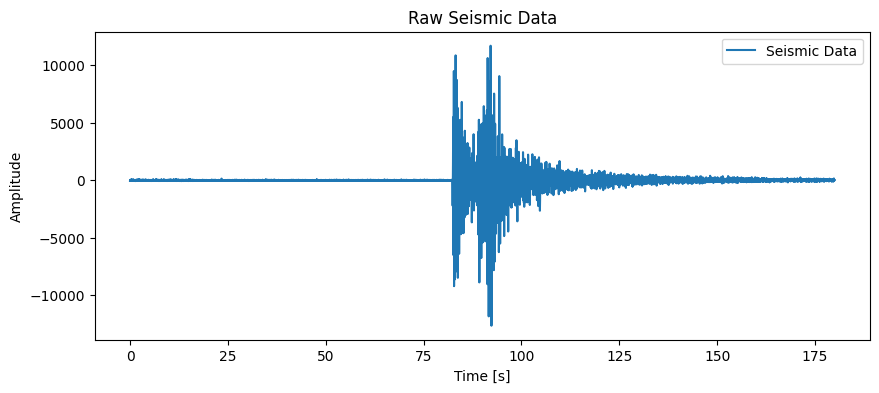

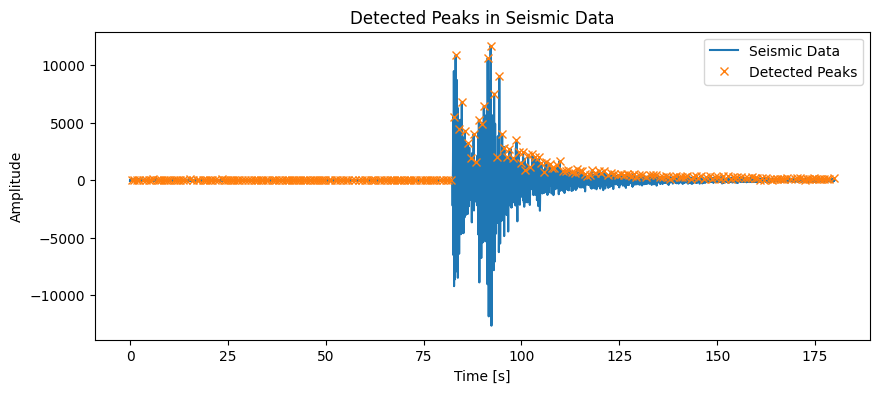

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read
from obspy.core import UTCDateTime
from scipy.signal import find_peaks
from mayavi import mlab

st = read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")
tr = st[0]

sampling_rate = tr.stats.sampling_rate
npts = tr.stats.npts
starttime = tr.stats.starttime

time = np.linspace(0, npts / sampling_rate, npts)

plt.figure(figsize=(10, 4))
plt.plot(time, tr.data, label='Seismic Data')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Raw Seismic Data')
plt.legend()
plt.show()

peaks, _ = find_peaks(tr.data, height=0.5, distance=100)
peak_times = peaks / sampling_rate

plt.figure(figsize=(10, 4))
plt.plot(time, tr.data, label='Seismic Data')
plt.plot(peak_times, tr.data[peaks], "x", label='Detected Peaks')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Detected Peaks in Seismic Data')
plt.legend()
plt.show()

x = np.random.uniform(-10, 10, len(peaks))
y = np.random.uniform(-10, 10, len(peaks))
z = peak_times

mlab.figure(size=(800, 600), bgcolor=(1, 1, 1))
mlab.points3d(x, y, z, scale_factor=0.5, color=(1, 0, 0))
mlab.axes(xlabel='X', ylabel='Y', zlabel='Time [s]')
mlab.title('3D Visualization of Seismic Activity')
mlab.show()
